# Titanic Project

# About Titanic Dataset

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, i have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# Importing Libraires

Here i am going to import important Libraires for EDA and Preprocessing. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
titanic=pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Here is the brief information about the above columns of dataset:
    
1. PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows. 

2. Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. Name: Passenger's name. 

5. Sex: Passenger's sex. It's either Male or Female.

6. Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. SibSp: Number of siblings or spouses travelling with each passenger.

8. Parch: Number of parents of children travelling with each passenger.
    
9. Ticket: Ticket number.
    
10. Fare: How much money the passenger has paid for the travel journey.
    
11. Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
    
12. Embarked: Port from where the particular passenger was embarked/boarded.

In [4]:
titanic.shape

(891, 12)

We have total 12 columns and 891 rows.

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The titanic dataset has 891 examples and 11 features + the target variable (Survived). 2 of the features are floats, 5 are integers and 5 are objects. 
in Further steps i have to convert object datatypes into integer types as per our requirement so that our algorithm process them.

In [6]:
null=titanic.isnull().sum()
null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

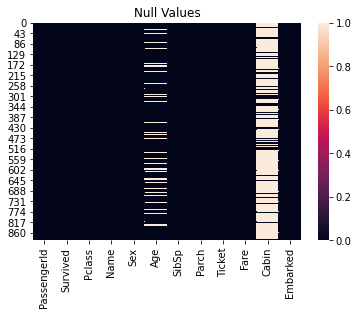

In [7]:
sns.heatmap(titanic.isnull())
plt.title('Null Values')
plt.show()

In [8]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


Unfortunately we have null values in this dataset.
177 null values in Age, 687 null values in Cabin and 2 null values in Ebmarked features.
In heatmap we can visualize the same about null values and we can observe it in percentage as well that about 20% in Age and 77% in Cabin null values are present.
I will deal with it in further steps.

# Statistical Summary

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lester, Mr. James",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In the above statistical we observe that 38% of the dataset survived the titanic. We also see that the passengers ages range from 0.4 to 80.
Frequency is showing the count of the top value of columns. Here we see that among 891 rows, 577 are "Male" and rest are "Female". We also observe that 644 people were embarked from "S" Port and Tickeck no. CA.2343 is repeated 7 times that can be duplicate value. And most used Cabin is B96 B98.

In [11]:
print("Sex: ",titanic['Sex'].unique())
print("Embarked: ",titanic['Embarked'].unique())
print("Pclass: ",titanic['Parch'].unique())

Sex:  ['male' 'female']
Embarked:  ['S' 'C' 'Q' nan]
Pclass:  [0 1 2 5 3 4 6]


# Label Encoding

Here i am going to use LabelEncoder for two features that are in string type having Categorical Data. So that i can convert it in int dtypes ahead.

In [12]:
sex_le=LabelEncoder()
titanic['Sex']=sex_le.fit_transform(titanic['Sex'])

Befor using LabelEncoder for "Embarked" feature i have to fill the null value in this column. As per above statistical summary we get that the most_frequent value in "Embarked" feature is 'S' so i am going to replace NaN value with 'S'.

In [13]:
titanic['Embarked'].fillna('S', inplace=True)

In [14]:
titanic['Embarked'].isnull().sum()

0

Above we can see that i have filled the null value successfully in 'Embarked' feature. Now i am going to LabelEncoder for this feature.

In [15]:
Em_le=LabelEncoder()
titanic['Embarked']=Em_le.fit_transform(titanic['Embarked'])

Now i will convert the "object' dtypes into int "type".

In [16]:
titanic['Sex']=titanic.Sex.astype(int)
titanic['Embarked']=titanic.Embarked.astype(int)


Above i have succefully converted the 'Object' dtype into 'Int' dtype.

# Correlation

Finding how all features are correlated with one other so that it can give an insight about the data.

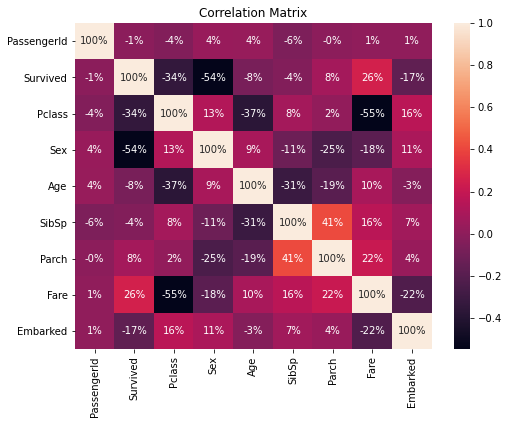

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(), annot=True, fmt='.0%')
plt.title("Correlation Matrix")
plt.show()

Here we see that our tareget variable ("Survived") is highly correlated with Fare that is 26% and it is a good correlation and "Parch" is also showhing positive correlation with the target variable that is 8% that can be considered as weak corrlation.
Rest features are negatively correlated with 'Survived' vfeature.

Now i will try to figure out the correlation of all feature only with Target variable.

In [18]:
correlations = titanic.corr()['Survived'].sort_values(ascending=False)
print(correlations)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


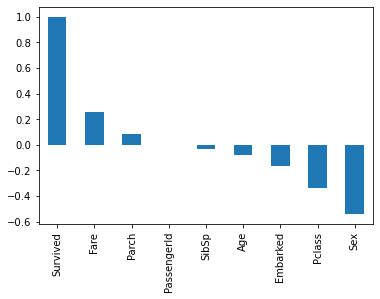

In [19]:
correlations.plot(kind='bar')

Here also we can visualize how our target variable are correlated with other features.

# Data Analysis

As we know that our target variable is "Survived" so i will try to analyze all features according to our target variable.

0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Survived VS Unsurvived')

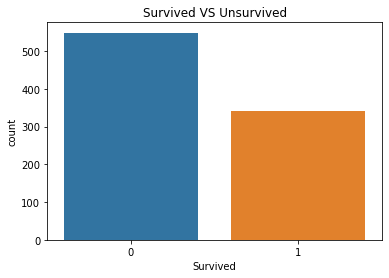

In [20]:
print(titanic.Survived.value_counts())
sns.countplot(x='Survived', data=titanic)
plt.title('Survived VS Unsurvived')

As we know that '1' stands for Survived and '0' stands for those who did not survived. So here we can see that 549 people died and 342 people survived at the titanic. 

1    577
0    314
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Male VS Female')

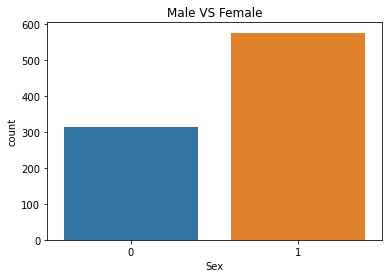

In [21]:
print(titanic.Sex.value_counts())
sns.countplot(x='Sex', data=titanic)
plt.title('Male VS Female')

Here i see number of people those who were on the titanic and we see that there were 577 Male and 314 Female on the tiatnic.

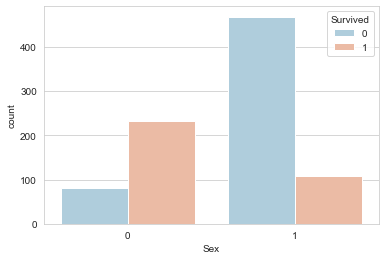

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Survived',data=titanic,palette='RdBu_r')

I can see the ratio of survived people based on "Sex" and we can see that Male died more than female and female survived more tha male.

In [23]:
var=['Pclass','Embarked','SibSp','Parch']
def plotcountgraph(var):
    sns.set_style('whitegrid')
    sns.set(font_scale=1.25)
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=var, hue='Survived', data=titanic,  palette="viridis")
    

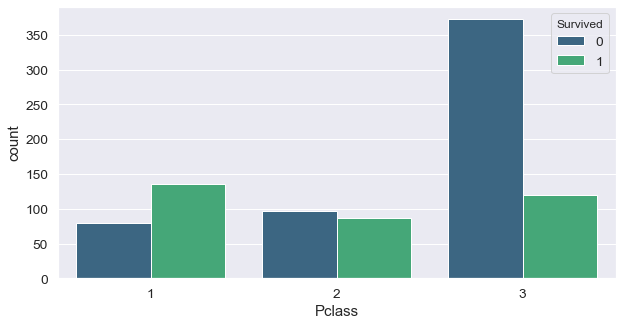

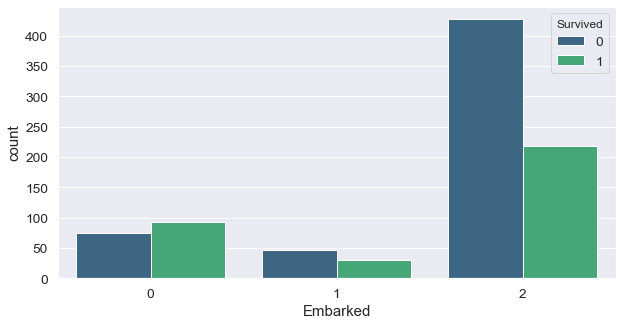

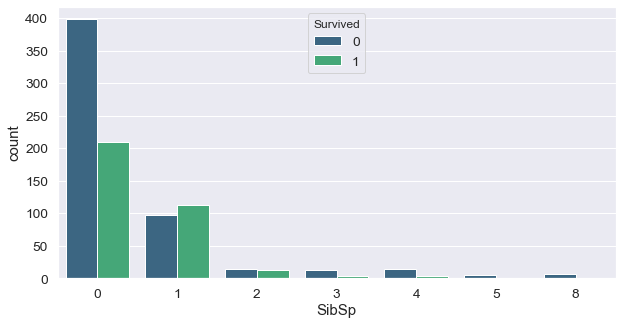

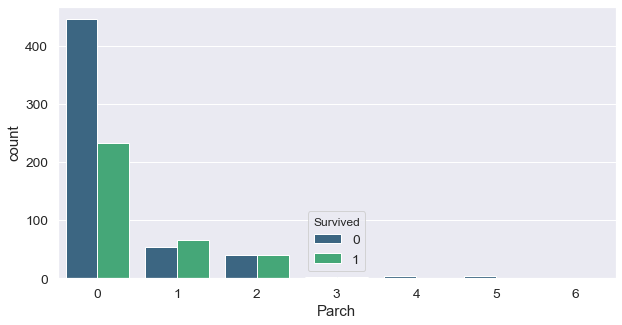

In [24]:
for i in var:
    plotcountgraph(i)

A brief explanation of above Countplots:

Firstly, people in 3rd class has more deaths in absolute measure, than people in others

Secondly, people embarked in "S"- town more more able to become deadmen.

Moreover, survival rate people with 1-2 parch is higher in comparison with other groups

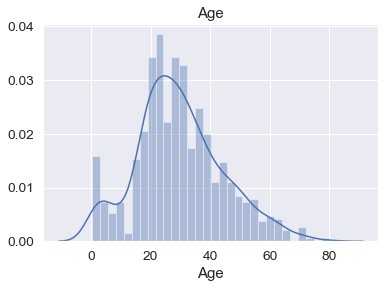

In [25]:
plt.title('Age')
sns.distplot(titanic['Age'].dropna(), bins=30, kde=True)

Here we can observe that most of passengers were on titanic in a range between 15-45.

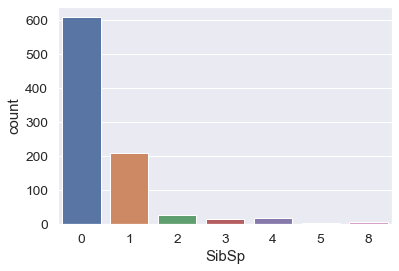

In [26]:
sns.countplot(x='SibSp',data=titanic)

Here we can observe that more than 600 people were without siblings or spouse on the titnic but rest of people have as this countplot is showing.

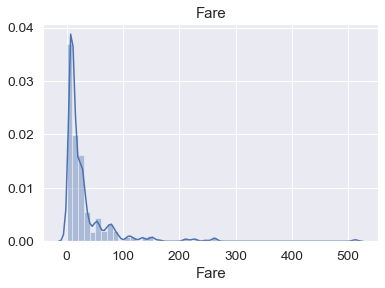

In [27]:
plt.title('Fare')
sns.distplot(titanic['Fare'], kde=True)

The fare rage was between 0-100 most of it.

# Data Cleaning and Filling

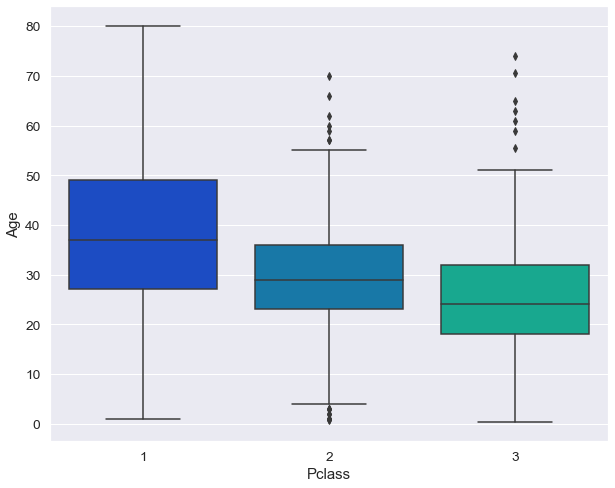

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

Here from this boxplot we observe that most of older people were in 1st Pclass incomprision of others. Such that if we see mean values of box plot of Pclass "1" we observe that roughly 39 is the mean value this boxplot.

Now i am going to fill null values in "Age" Feature by using "fillna" Method.

In [29]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [30]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Now we have no null values except in "Cabin" variable that is not so important for the prediction that is why i am going to drop it along with some other features that is not play important role.

In [31]:
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [32]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Now my dataset is cleaned and there are no null values left in it.

# Splitting Dataset into X and Y Sets.

In [33]:
x=titanic.drop('Survived', axis= 1)
y=titanic["Survived"]

# Checking Skewness

In [34]:
print(x.skew())
print(y.skew())

Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64
0.4785234382949897


As i can see in my x dataset there is skewness present. So i will remove it first.

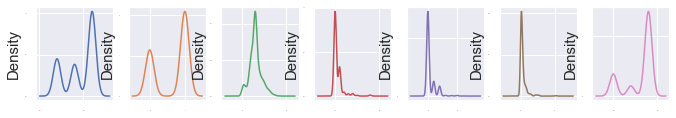

In [35]:
# multivariate analysis

x.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

Some positively/Right and negatively/Left skewed.

# Removing Skewness

In [37]:
from sklearn.preprocessing import power_transform
data=power_transform(x)

x=pd.DataFrame(data,columns=x.columns)


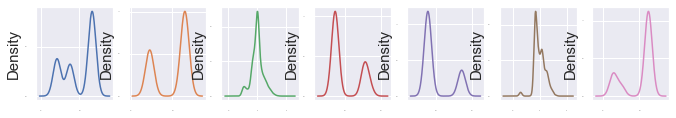

In [38]:
x.plot(kind='density',subplots=True, layout=(6,11),sharex=False, legend=False,fontsize=1,figsize=(18,12))
plt.show()

Now Skewness is removed.

# Importing impotant Libraries for Model Execution

Above we have seen this that this dataset has calssification problem as our target variable is in bianry value.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Finding Best RandomState Value

In [40]:
# Splitiing Dataset into training and test set 
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf= lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)  

Best accuracy is 0.8470149253731343 on Random_state 6


# Creating Train_Test_Split 

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=6)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (623, 7)
x_test (268, 7)
y_train (623,)
y_test (268,)


Here i am going to use 30% of all data for test_size with random state value '6' and we can see clearly how amny rows and columns are coming in our train and test set.

In [53]:
lr=LogisticRegression()
svc=SVC(),
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print("Confusion Matrix:",confusion_matrix(y_test,predm))
    print("Classification Report:",classification_report(y_test,predm))
    print('\n')


Accuracy Score of LogisticRegression() is:
0.8470149253731343
Confusion Matrix: [[159  15]
 [ 26  68]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.91      0.89       174
           1       0.82      0.72      0.77        94

    accuracy                           0.85       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.85      0.85      0.84       268



Accuracy Score of SVC() is:
0.8283582089552238
Confusion Matrix: [[165   9]
 [ 37  57]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.95      0.88       174
           1       0.86      0.61      0.71        94

    accuracy                           0.83       268
   macro avg       0.84      0.78      0.80       268
weighted avg       0.83      0.83      0.82       268



Accuracy Score of DecisionTreeClassifier() is:
0.8022388059701493
Confusion Matrix: [[144  30]
 [ 23  71]

Here we observe that LogisticRegression have highest Accuracy Score that is 85% but it can be because of overfitting of dataset. So i will move further with Cross Validation method.

# Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
for c in model:
    score=cross_val_score(c,x,y,cv=5)
    print("Cross Validation of:", c)
    print(score.mean())

Cross Validation of: LogisticRegression()
0.7923921913250895
Cross Validation of: SVC()
0.8159374803841567
Cross Validation of: DecisionTreeClassifier()
0.7699516665620487
Cross Validation of: RandomForestClassifier()
0.8058376749733224


Now i will make a dataframe of Accuracy Score and Cross Validation so that i can visualize the difference between them.

In [59]:
models={'Models':['Logistic Regression','Support Vector Classifier','Decision Tree','Random Forest'],
       'Accuracy':[85,83,80,82],
       "Cross-Val":[79,81,76,80]}
model_acc = pd.DataFrame(models,index = ['1','2','3','4'], 
                     columns = ['Models','Accuracy','Cross-Val'])
model_acc

,Models,Accuracy,Cross-Val
1,Logistic Regression,85,79
2,Support Vector Classifier,83,81
3,Decision Tree,80,76
4,Random Forest,82,80


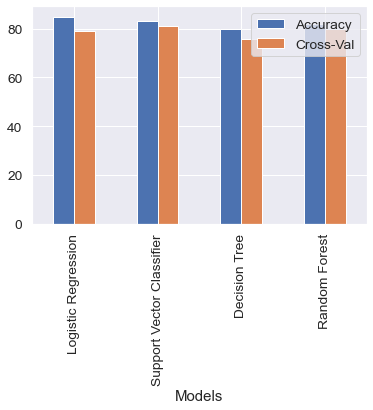

In [66]:
model_acc.plot(x='Models',y=['Accuracy','Cross-Val'], kind='bar')
plt.show()

Here we observe that there almost same differences in two modeles but SVC has more accuracy score than RandomForest so this will be my best model for this dataset.

# Hyper Parameter Tunning

In [98]:
from sklearn.model_selection import GridSearchCV
parameters= {'kernel':['linear','rbf','poly','sigmoid'],
            'C':[100.10,1,0.01,0.001]}

In [99]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100.1, 1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [101]:
GCV.best_params_

{'C': 1, 'kernel': 'rbf'}

In [105]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8283582089552238

# Saving Model

In [106]:
import joblib
joblib.dump(GCV.best_estimator_,"Titanic.pkl")

['Titanic.pkl']